In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.stats.stattools import durbin_watson
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
         'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

dataset = pd.read_csv(url, sep='\s+', names=names)

dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [4]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None


In [5]:
print(dataset.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

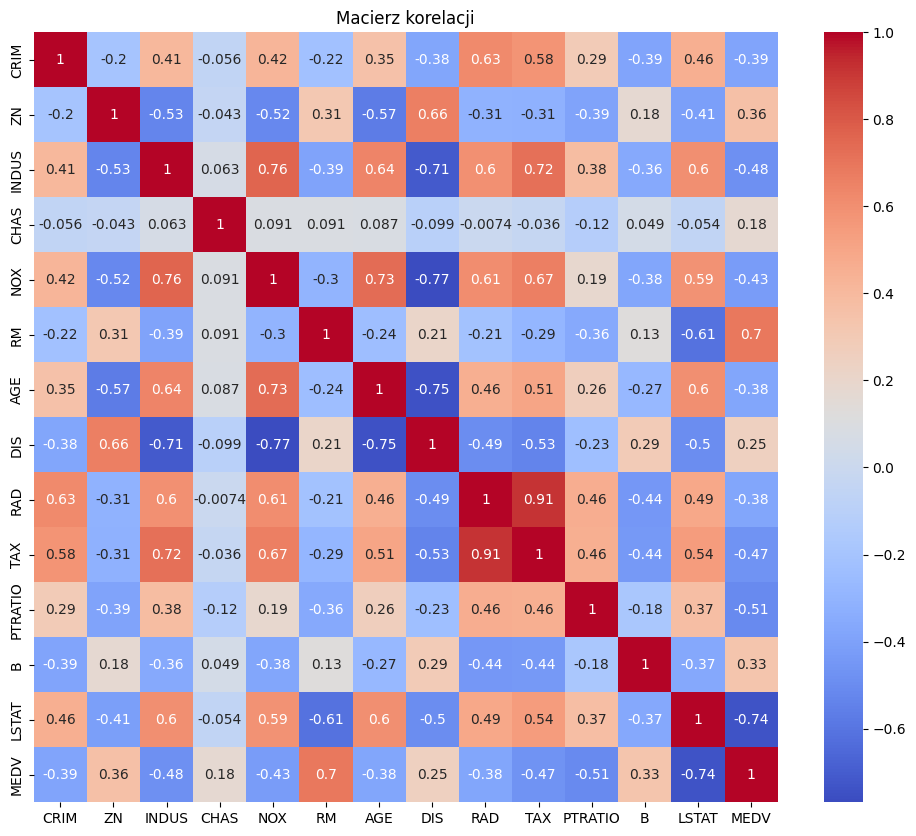

In [6]:
plt.figure(figsize=(12,10))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')
plt.title('Macierz korelacji')
plt.show()

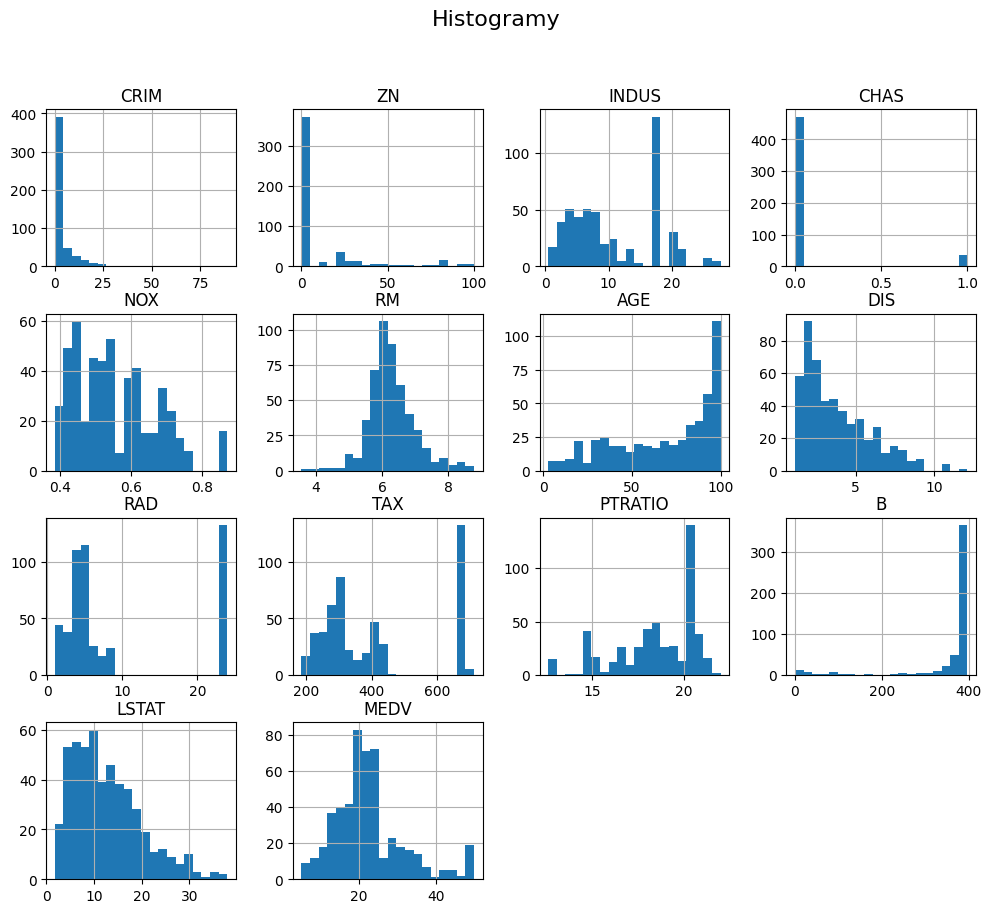

In [7]:
dataset.hist(figsize=(12, 10), bins=20)
plt.suptitle('Histogramy', fontsize=16)
plt.show()

In [8]:
X = dataset.drop('MEDV', axis=1)
y = dataset['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [9]:
lr = LinearRegression()
lr.fit(X_train, y_train)

xg_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3,
                          learning_rate=0.1, max_depth=5, alpha=10, n_estimators=10)
xg_reg.fit(X_train, y_train)

XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=10,
             n_jobs=None, ...)

In [10]:
params = {
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200]
}

xg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3)

grid = GridSearchCV(estimator=xg, param_grid=params, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

print("Best score: %f using params:\n %s" % (grid.best_score_, grid.best_params_))

Best score: -11.053926 using params:
 {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


In [11]:
#Model z nowymi parametrami
best_params = grid.best_params_

xg_best = xgb.XGBRegressor(
    objective='reg:squarederror',
    learning_rate=best_params['learning_rate'],
    max_depth=best_params['max_depth'],
    n_estimators=best_params['n_estimators'],
    colsample_bytree=0.3
)

xg_best.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

In [12]:
y_pred_lr = lr.predict(X_test)
print('Linear Regression: MSE:', mean_squared_error(y_test, y_pred_lr))
print('Linear Regression: MAE:', mean_absolute_error(y_test, y_pred_lr))
print('Linear Regression: R2:', r2_score(y_test, y_pred_lr))

y_pred_xg = xg_reg.predict(X_test)
print('XGBoost: MSE:', mean_squared_error(y_test, y_pred_xg))
print('XGBoost: MAE:', mean_absolute_error(y_test, y_pred_xg))
print('XGBoost: R2:', r2_score(y_test, y_pred_xg))

Linear Regression: MSE: 28.40585481050826
Linear Regression: MAE: 3.6913626771162606
Linear Regression: R2: 0.64856457423707
XGBoost: MSE: 33.133851891482976
XGBoost: MAE: 4.100101427028053
XGBoost: R2: 0.5900700956078417


In [13]:
y_pred_lr = lr.predict(X_test)        #Regresja liniowa
y_pred_xg_old = xg_reg.predict(X_test) #Stary XGBoost
y_pred_xg_best = xg_best.predict(X_test) #Nowy, najlepszy XGBoost

In [14]:
def evaluate_model(name, y_true, y_pred):
    print(f"{name}\n")
    print("MSE:", mean_squared_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("R2:", r2_score(y_true, y_pred))
    print("\n")

#Wyniki dla każdego modelu
evaluate_model("Regresja liniowa", y_test, y_pred_lr)
evaluate_model("XGBoost (stary)", y_test, y_pred_xg_old)
evaluate_model("XGBoost (najlepsze parametry)", y_test, y_pred_xg_best)

Regresja liniowa

MSE: 28.40585481050826
RMSE: 5.329714327288871
MAE: 3.6913626771162606
R2: 0.64856457423707


XGBoost (stary)

MSE: 33.133851891482976
RMSE: 5.756201168434176
MAE: 4.100101427028053
R2: 0.5900700956078417


XGBoost (najlepsze parametry)

MSE: 13.529828378940273
RMSE: 3.678291502714307
MAE: 2.3423078047601806
R2: 0.8326098253838407




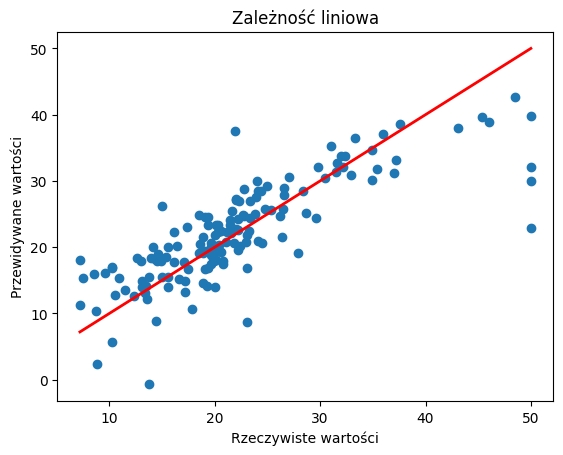

In [15]:
#zaleznosc liniowa
plt.scatter(y_test, y_pred_lr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel("Rzeczywiste wartości")
plt.ylabel("Przewidywane wartości")
plt.title("Zależność liniowa")
plt.show()

In [16]:
#liczba obserwacji
print(f"Liczba obserwacji w zbiorze treningowym: {X_train.shape[0]}")
print(f"Liczba zmiennych (predyktorów): {X_train.shape[1]}")

Liczba obserwacji w zbiorze treningowym: 354
Liczba zmiennych (predyktorów): 13


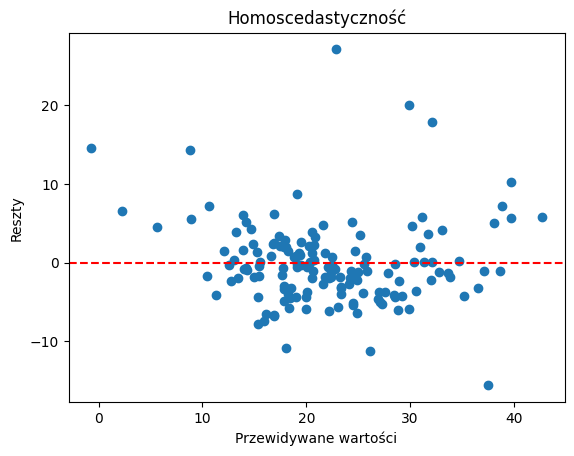

In [17]:
residuals = y_test - y_pred_lr

#homoscedastyczność (reszty vs przewidywane wartości)
plt.scatter(y_pred_lr, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Przewidywane wartości")
plt.ylabel("Reszty")
plt.title("Homoscedastyczność")
plt.show()

In [18]:
#brak autokorelacji reszt
dw = durbin_watson(residuals)
print(f"Durbin-Watson statistic: {dw}")

Durbin-Watson statistic: 1.9436117415540641


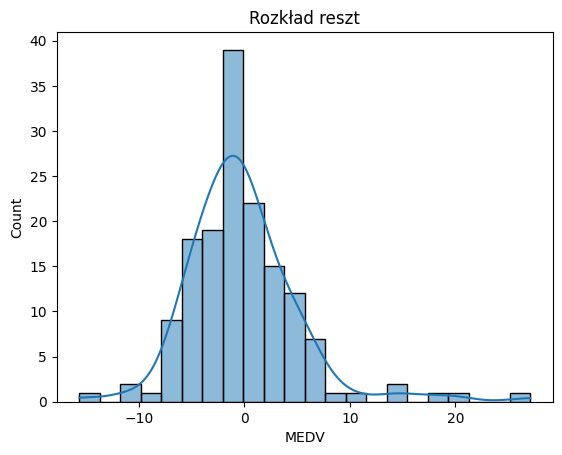

Shapiro-Wilk test: ShapiroResult(statistic=0.892426164793892, pvalue=4.2372230059043955e-09)


In [19]:
#rozklad reszt i test
sns.histplot(residuals, kde=True)
plt.title("Rozkład reszt")
plt.show()

shapiro_test = stats.shapiro(residuals)
print("Shapiro-Wilk test:", shapiro_test)

In [20]:
#brak wspolliniowosci predyktorow (VIF)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

    feature        VIF
0      CRIM   2.100373
1        ZN   2.844013
2     INDUS  14.485758
3      CHAS   1.152952
4       NOX  73.894947
5        RM  77.948283
6       AGE  21.386850
7       DIS  14.699652
8       RAD  15.167725
9       TAX  61.227274
10  PTRATIO  85.029547
11        B  20.104943
12    LSTAT  11.102025
